In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the data
df = pd.read_csv('winemag-data_first150k.csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape

(97851, 10)

In [5]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
country        97848 non-null object
description    97851 non-null object
designation    67955 non-null object
points         97851 non-null int64
price          89131 non-null float64
province       97848 non-null object
region_1       81919 non-null object
region_2       39491 non-null object
variety        97851 non-null object
winery         97851 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


In [6]:
## Check the stats
df.describe()

,points,price
count,97851.000000,89131.000000
mean,87.956730,33.658783
std,3.218138,37.670180
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [7]:
## See the variance

#df.var()

In [8]:
## Function to remove outliers

def remove_outliers(data_frame, column_list, low=0.02, high=0.98):
   for column in column_list:
       this_column = data_frame[column]
       quant_df = this_column.quantile([low,high])
       low_limit = quant_df[low]
       high_limit = quant_df[high]
       data_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
   return data_frame

# Remove outlier
columns_outlier = ['price']

news_train_df = remove_outliers(df, columns_outlier)


In [9]:
news_train_df.shape

(97851, 10)

In [10]:
df = news_train_df

In [11]:
## Check the stats again
df.describe()

,points,price
count,97851.000000,89131.000000
mean,87.956730,31.982924
std,3.218138,23.391504
min,80.000000,9.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,120.000000


In [12]:
## Find how many null values
df.isnull().sum()

country            3
description        0
designation    29896
points             0
price           8720
province           3
region_1       15932
region_2       58360
variety            0
winery             0
dtype: int64

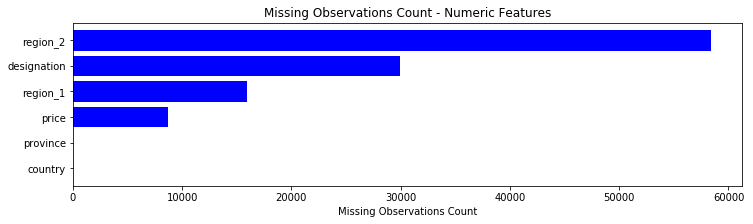

In [13]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [14]:
df = df[df.price.notnull()]

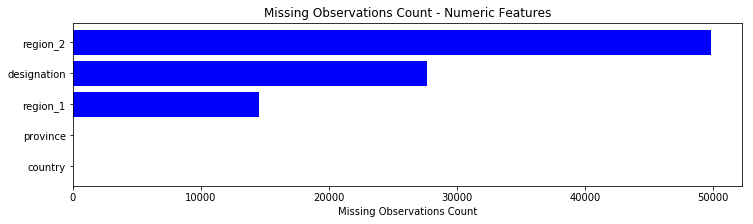

In [15]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [16]:
## Find how many unique values
df.nunique()

country           46
description    89108
designation    28346
points            21
price            112
province         446
region_1        1197
region_2          18
variety          619
winery         13852
dtype: int64

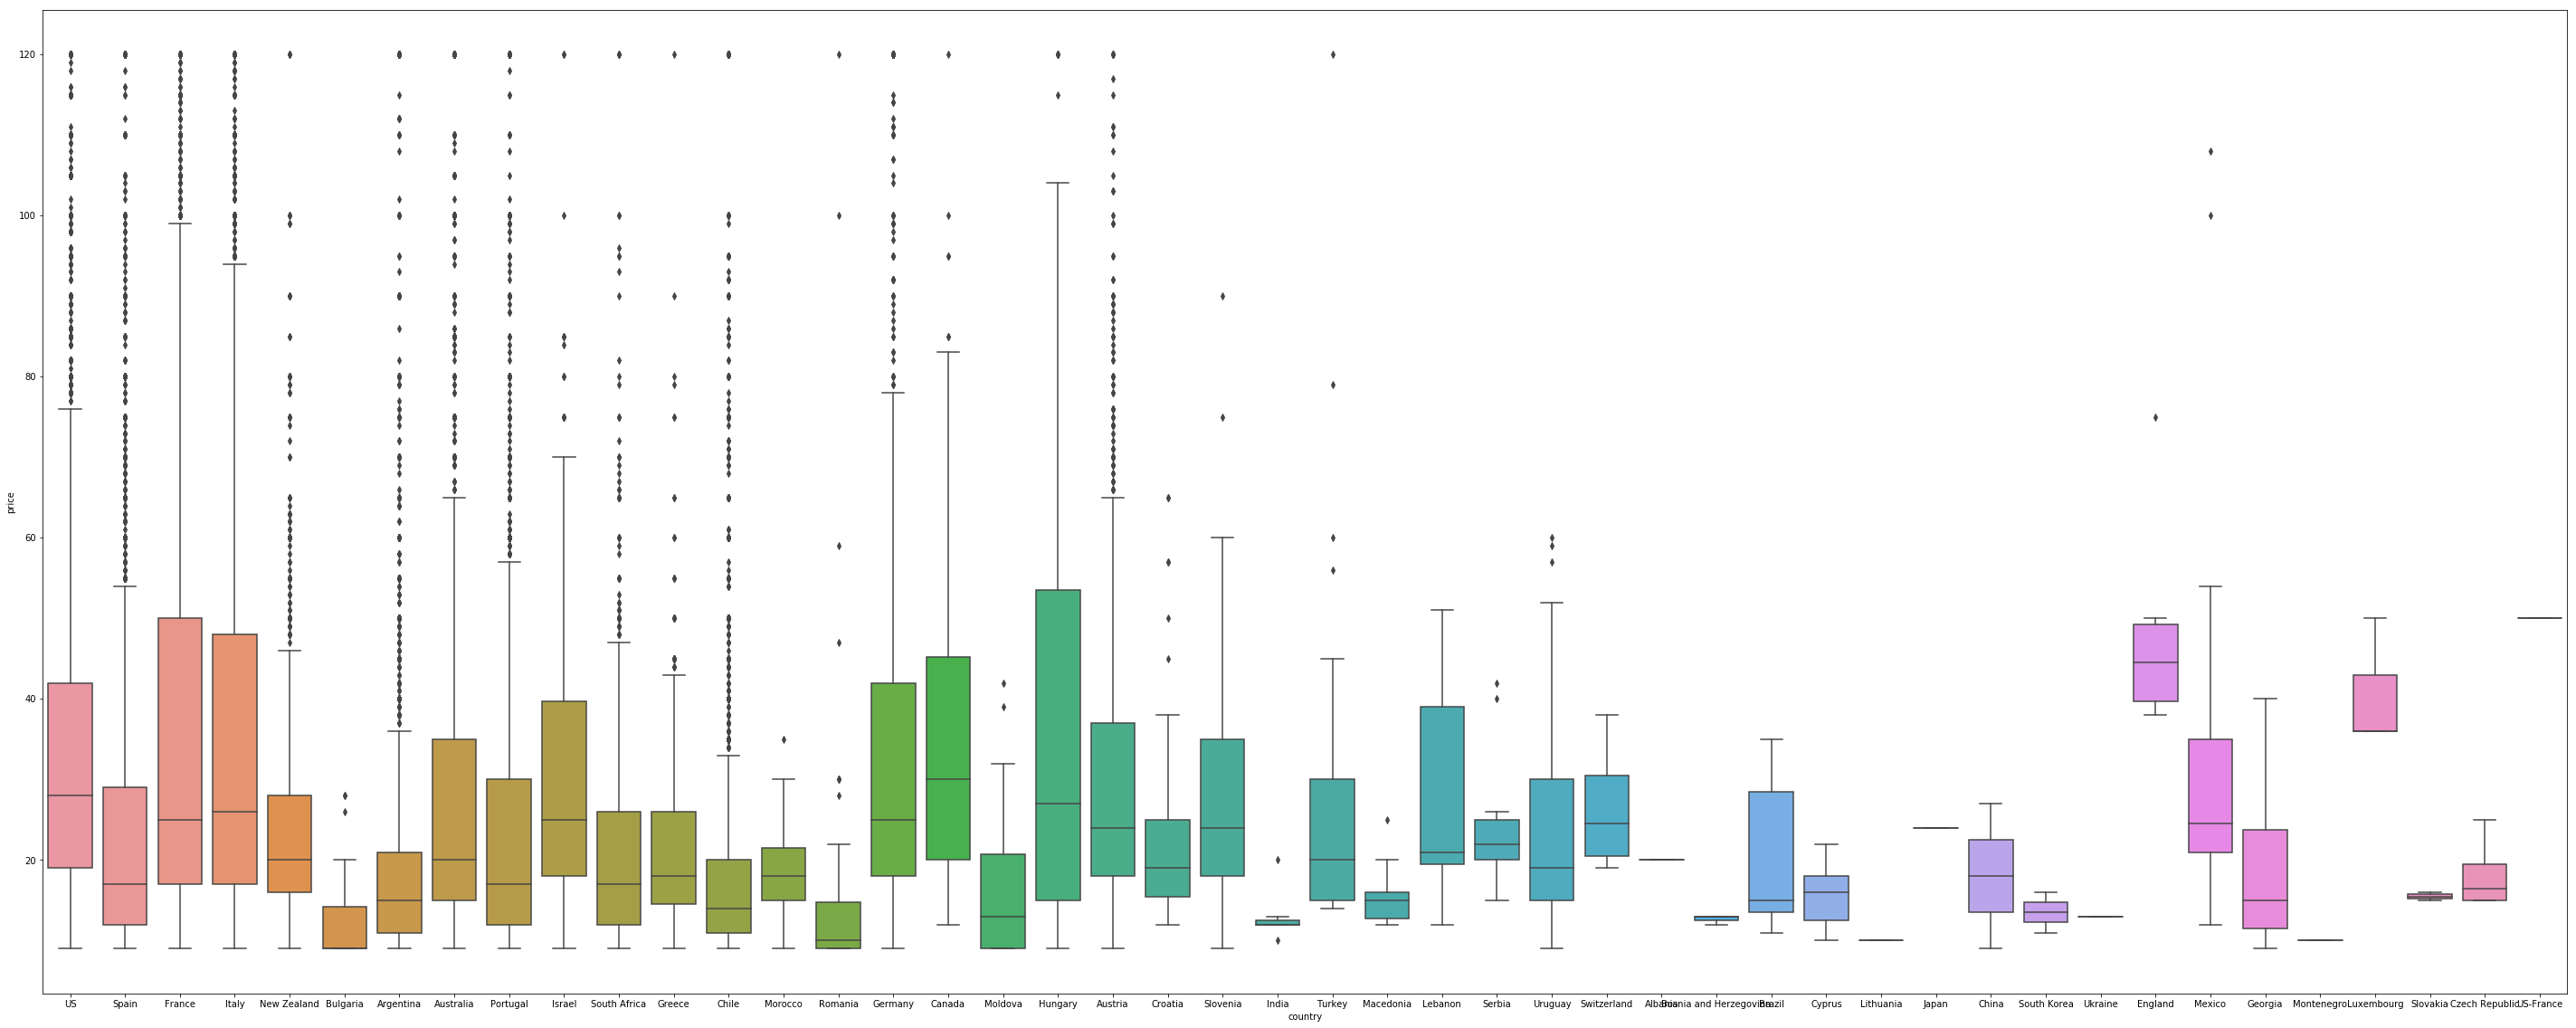

In [17]:
## Box plot

plt.figure(figsize=(50,20))
sns.boxplot(x="country", y="price", data=df)
plt.show()

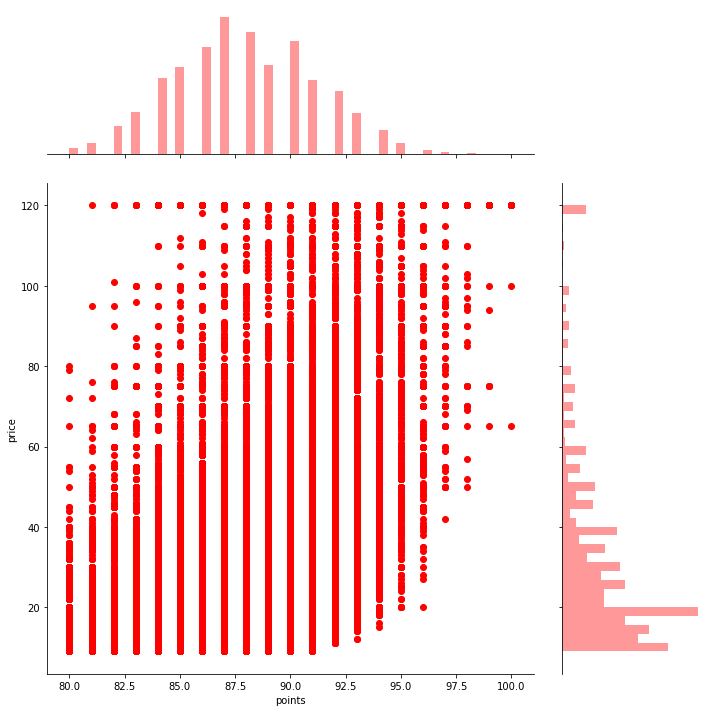

In [18]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="points", y="price", data=df, height=10, ratio=3, color="r")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

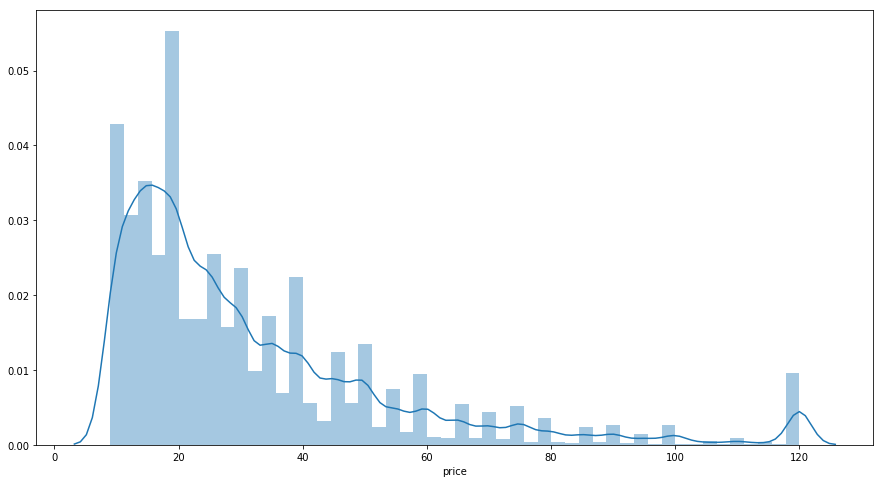

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(df['price'])
plt.show

In [20]:
df.quantile(.75, axis = 0)

points    90.0
price     40.0
Name: 0.75, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

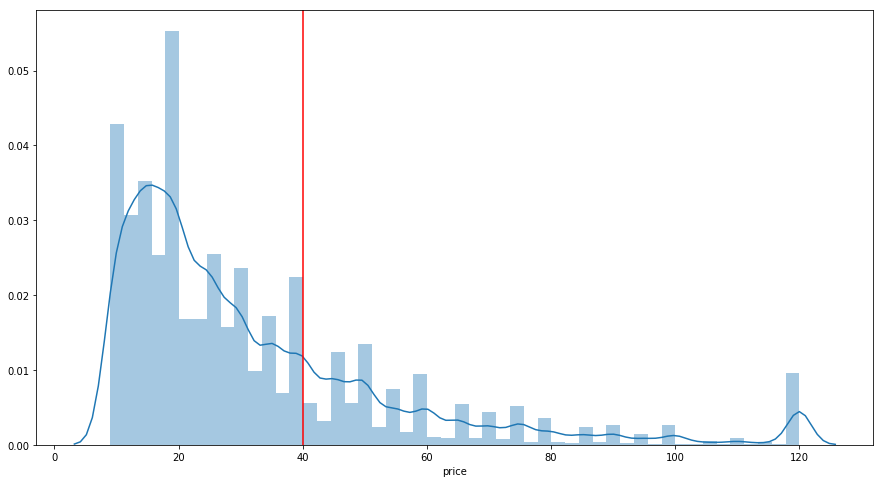

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(df['price'])
plt.axvline(40.0, 0,1, color='r')
plt.show

In [22]:
#Pre-Process Data

df['Premium'] = np.where(df['price'] >= 40, 1, 0)
df['extended_description'] = df['description'] + df['province'] + df['variety'] + df['winery']

df.head()

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Premium,extended_description
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,120.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,1,This tremendous 100% varietal wine hails from ...
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,1,"Ripe aromas of fig, blackberry and cassis are ..."
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1,Mac Watson honors the memory of a wine once ma...
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1,"This spent 20 months in 30% new French oak, an..."
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1,"This is the top wine from La Bégude, named aft..."


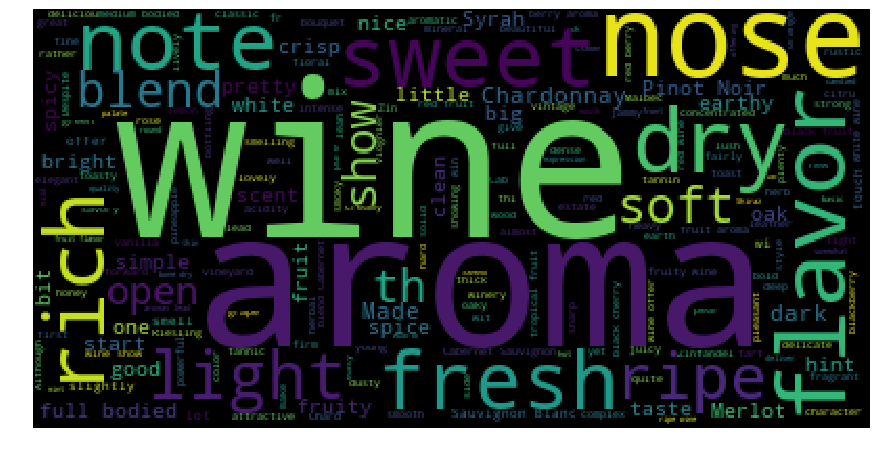

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from scipy.misc import imread
from os import path


plt.figure(figsize=(15,8))
df_under = df[df['price'] < 40]
wordcloud = WordCloud().generate(df_under['extended_description'].to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

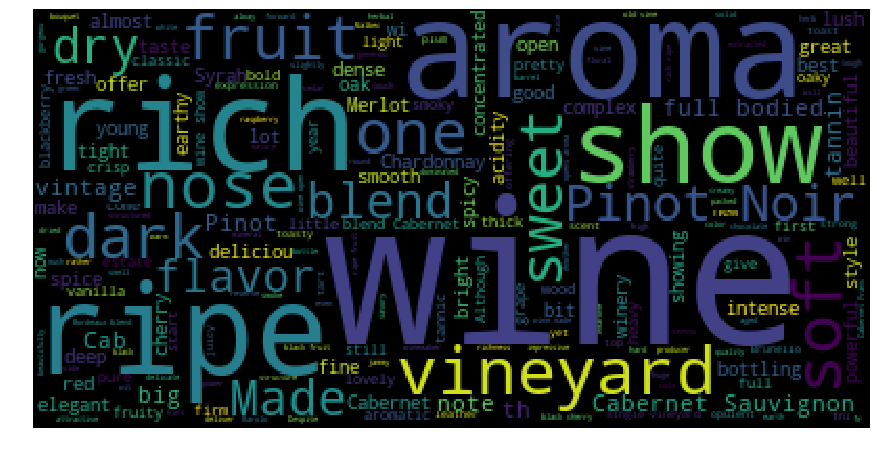

In [38]:
plt.figure(figsize=(15,8))
df_over = df[df['price'] > 40]
wordcloud = WordCloud().generate(df_over['extended_description'].to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [ ]:
df['extended_description'].isnull().sum()

In [ ]:
df = df[df.extended_description.notnull()]

In [ ]:
df['extended_description'].isnull().sum()

In [ ]:
model = df

model.drop(['country', 'description', 'designation',
           'points', 'province', 'region_1', 'region_2',
           'variety', 'winery', 'price'], axis=1, inplace=True)


model.head()

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib

# Features and Labels
X = df['extended_description']
y = df['Premium']

# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


In [ ]:
pickle.dump(cv, open('tranform.pkl', 'wb'))
filename = 'wine_predict_nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))